# Investigacion creditos otorgados por icetex

## Base: Creditos Otorgados por ICETEX
se realiza esta investigacion en pro de revisar como interactua el icetex con el usuario final en terminos de la financiacion de la educacion, mas especifico, se desea investigar cuales son esos segmentos de la poblacion civil los cuales reciben mas recursos de esta entidad.
### descripcion de la base de datos:
la base cuenta con 13 columnas y la data basica otorgada es de 145.000 filas:

columnas de la tabla de datos: 
Nombre de la columna
SEXO
ESTRATO SOCIOECONÓMICO
CÓDIGO DE DEPARTAMENTO DE ORIGEN
DEPARTAMENTO DE ORIGEN
CATEGORÍA DEL MUNICIPIO DE ORIGEN
SECTOR IES
NIVEL DE FORMACIÓN
MODALIDAD DE LÍNEA
MODALIDAD DEL CRÉDITO
VIGENCIA
PERIODO OTORGAMIENTO
RANGO DEL VALOR TOTAL DESEMBOLSADO
NÚMERO DE NUEVOS BENEFICIARIOS DE CRÉDITO

### preguntas a responder:
1. que estratos socieconomicos son los mas beneficiados por los recursos del icetex?
2. que departamentos se listan con mas financiacion de parte de esta entidad?
3. que niveles de educacion son los que financia el icetex? (tecnologo,tecnico,pregrado,posgrado etc)
4. cuales son las modalidades de credito mas usadas
5. cuales son los sexos que mas recursos del icetex recibe? existe alguna relacion entre sexo y beneficio?


## Iniciamos con el proceso de limpieza de datos:

In [2]:
import pandas as pd

In [3]:
data=pd.read_csv("C:/Users/Home/Repositorio_investigacion/Data/Cr_ditos_Otorgados_por_ICETEX.csv")

In [4]:
# una vista preliminar del DF
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144595 entries, 0 to 144594
Data columns (total 13 columns):
 #   Column                                     Non-Null Count   Dtype 
---  ------                                     --------------   ----- 
 0   SEXO                                       144595 non-null  object
 1   ESTRATO SOCIOECONÓMICO                     144595 non-null  int64 
 2   CÓDIGO DE DEPARTAMENTO DE ORIGEN           144595 non-null  int64 
 3   DEPARTAMENTO DE ORIGEN                     144595 non-null  object
 4   CATEGORÍA DEL MUNICIPIO DE ORIGEN          144595 non-null  object
 5   SECTOR IES                                 135282 non-null  object
 6   NIVEL DE FORMACIÓN                         144595 non-null  object
 7   MODALIDAD DE LÍNEA                         144595 non-null  object
 8   MODALIDAD DEL CRÉDITO                      144595 non-null  object
 9   VIGENCIA                                   144595 non-null  int64 
 10  PERIODO OTORGAMIENTO

In [5]:
data.head()

,SEXO,ESTRATO SOCIOECONÓMICO,CÓDIGO DE DEPARTAMENTO DE ORIGEN,DEPARTAMENTO DE ORIGEN,CATEGORÍA DEL MUNICIPIO DE ORIGEN,SECTOR IES,NIVEL DE FORMACIÓN,MODALIDAD DE LÍNEA,MODALIDAD DEL CRÉDITO,VIGENCIA,PERIODO OTORGAMIENTO,RANGO DEL VALOR TOTAL DESEMBOLSADO,NÚMERO DE NUEVOS BENEFICIARIOS DE CRÉDITO
0,FEMENINO,1,5,ANTIOQUIA,CIUDADES Y AGLOMERACIONES,OFICIAL,FORMACION TECNICA PROFESIONAL,PREGRADO,MATRICULA,2015,2015-1,I,1
1,FEMENINO,1,5,ANTIOQUIA,CIUDADES Y AGLOMERACIONES,OFICIAL,FORMACION TECNICA PROFESIONAL,PREGRADO,MATRICULA,2015,2015-1,IV,2
2,FEMENINO,1,5,ANTIOQUIA,CIUDADES Y AGLOMERACIONES,OFICIAL,FORMACION TECNICA PROFESIONAL,PREGRADO,MATRICULA,2015,2015-1,V,1
3,FEMENINO,1,5,ANTIOQUIA,CIUDADES Y AGLOMERACIONES,OFICIAL,TECNOLOGICA,PREGRADO,SOSTENIMIENTO,2015,2015-1,I,1
4,FEMENINO,1,5,ANTIOQUIA,CIUDADES Y AGLOMERACIONES,OFICIAL,UNIVERSITARIA,PREGRADO,MATRICULA,2015,2015-1,I,5


In [6]:
# seleccionamos los datos a utilizar
data_relevante=data[["SEXO","ESTRATO SOCIOECONÓMICO","DEPARTAMENTO DE ORIGEN","SECTOR IES","NIVEL DE FORMACIÓN","MODALIDAD DE LÍNEA",
                 "MODALIDAD DEL CRÉDITO"]]

In [7]:
data_relevante.info() # revisamos la situacion

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144595 entries, 0 to 144594
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   SEXO                    144595 non-null  object
 1   ESTRATO SOCIOECONÓMICO  144595 non-null  int64 
 2   DEPARTAMENTO DE ORIGEN  144595 non-null  object
 3   SECTOR IES              135282 non-null  object
 4   NIVEL DE FORMACIÓN      144595 non-null  object
 5   MODALIDAD DE LÍNEA      144595 non-null  object
 6   MODALIDAD DEL CRÉDITO   144595 non-null  object
dtypes: int64(1), object(6)
memory usage: 7.7+ MB


se presenta una cantidad de espacios vacios para SECTOR IES por los demas los datos son congruentes, vamos a proceder a revisar cuales son los datos vacios

In [8]:
data_relevante["SECTOR IES"].isnull().sum() # tenemos un total de 9313 filas sin el dato SECTOR IES

9313

In [9]:
# deseamos saber cuales son las filas donde se presenta esta situacion, para eso usamos LOC

data_relevante.loc[data_relevante["SECTOR IES"].isnull()]

,SEXO,ESTRATO SOCIOECONÓMICO,DEPARTAMENTO DE ORIGEN,SECTOR IES,NIVEL DE FORMACIÓN,MODALIDAD DE LÍNEA,MODALIDAD DEL CRÉDITO
39,FEMENINO,1,ATLÁNTICO,NaN,EDUCACION CONTINUADA,CRÉDITO EXTERIOR,MATRICULA
229,FEMENINO,1,CAQUETÁ,NaN,EDUCACION CONTINUADA,CRÉDITO EXTERIOR,MATRICULA
248,FEMENINO,1,CAUCA,NaN,EDUCACION CONTINUADA,CRÉDITO EXTERIOR,MATRICULA
280,FEMENINO,1,CAUCA,NaN,EDUCACION CONTINUADA,CRÉDITO EXTERIOR,MATRICULA
330,FEMENINO,1,CÓRDOBA,NaN,EDUCACION CONTINUADA,CRÉDITO EXTERIOR,MATRICULA
...,...,...,...,...,...,...,...
144576,Masculino,6,CESAR,NaN,Educación continuada,CRÉDITO EXTERIOR,SOSTENIMIENTO
144580,Masculino,6,NORTE DE SANTANDER,NaN,Educación continuada,CRÉDITO EXTERIOR,MATRICULA
144586,Masculino,6,SANTANDER,NaN,Educación continuada,CRÉDITO EXTERIOR,SOSTENIMIENTO
144589,Masculino,6,TOLIMA,NaN,Educación continuada,CRÉDITO EXTERIOR,MATRICULA


In [10]:
# decidimos que para no alterar la data, y evidenciando que no se va a afectar el analisis que hacemos ya que los NA corresponden a credito
# al exterior, vamos a reemplazar los NA con "Sin sector IES"

In [11]:
# procedemos a reemplazar los valores N/A con "sin sector IES"

data_relevante["SECTOR IES"].fillna("Sin sector IES",inplace=True)

C:\Users\Home\AppData\Local\Temp\ipykernel_15832\3005999864.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_relevante["SECTOR IES"].fillna("Sin sector IES",inplace=True)


In [12]:
data_relevante.info() # ahora tenemos datos mas consisos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144595 entries, 0 to 144594
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   SEXO                    144595 non-null  object
 1   ESTRATO SOCIOECONÓMICO  144595 non-null  int64 
 2   DEPARTAMENTO DE ORIGEN  144595 non-null  object
 3   SECTOR IES              144595 non-null  object
 4   NIVEL DE FORMACIÓN      144595 non-null  object
 5   MODALIDAD DE LÍNEA      144595 non-null  object
 6   MODALIDAD DEL CRÉDITO   144595 non-null  object
dtypes: int64(1), object(6)
memory usage: 7.7+ MB


In [13]:
# vamos a revisar la cantidad de variables categoricas por columna

columnas_seleccionadas=["SEXO","ESTRATO SOCIOECONÓMICO","DEPARTAMENTO DE ORIGEN","SECTOR IES","NIVEL DE FORMACIÓN","MODALIDAD DE LÍNEA",
                 "MODALIDAD DEL CRÉDITO"]

for col in columnas_seleccionadas:
    print("columa: {}, cantidad de variables-subniveles: {}".format(col,data_relevante[col].nunique()))

columa: SEXO, cantidad de variables-subniveles: 5
columa: ESTRATO SOCIOECONÓMICO, cantidad de variables-subniveles: 6
columa: DEPARTAMENTO DE ORIGEN, cantidad de variables-subniveles: 35
columa: SECTOR IES, cantidad de variables-subniveles: 3
columa: NIVEL DE FORMACIÓN, cantidad de variables-subniveles: 23
columa: MODALIDAD DE LÍNEA, cantidad de variables-subniveles: 3
columa: MODALIDAD DEL CRÉDITO, cantidad de variables-subniveles: 3


sexo posee 5 variables, algo muy extraño, estrato socieconomico esta bien si consideramos que en colombia hay 6 niveles, departamento origen tambien parece estar bien, sector IES tambien, niveles de formacion cuenta con 23, las otras tambien estan bien

en general la informacion para ser mas concisa, sin embargo, generaremos varios graficos para revisar exactamente que no tengamos errores tipograficos

In [14]:
# analizando las variables individualmente:
# sexo

import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# mapeamos cada valor de texto a un valor numerico

mapping={cat: idx for idx, cat in enumerate(data_relevante['SEXO'].unique())}
data_relevante['cat_numerico_SEXO']=data_relevante['SEXO'].map(mapping)

C:\Users\Home\AppData\Local\Temp\ipykernel_15832\995315679.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_relevante['cat_numerico_SEXO']=data_relevante['SEXO'].map(mapping)


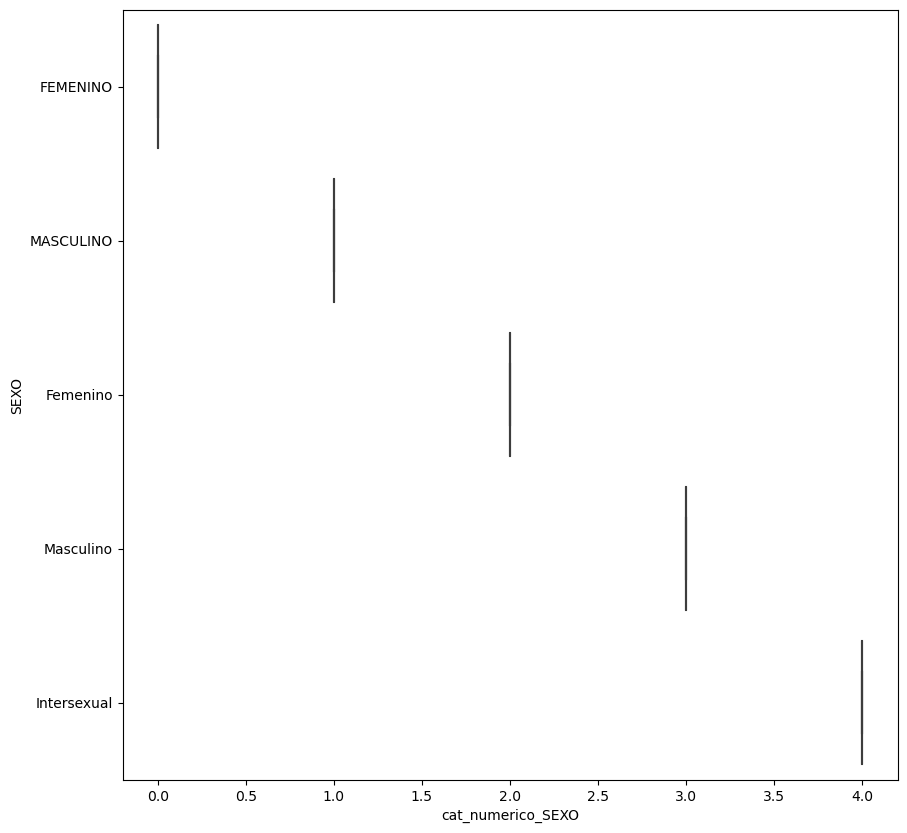

In [16]:
## graficamos

plt.figure(figsize=(10,10))

sns.boxplot(x='cat_numerico_SEXO',y='SEXO',data=data_relevante)
plt.show()

Observamos que tenemos un problema en la variable sexo, ya que tenemos errores tipograficos, debemos arreglarlo para poder continuar

In [17]:
## arreglando la tipografica de SEXO
## usamos el metodo replace y su variable regex para que convierta todas las casualidad en Masculino y Femenino
data_relevante['SEXO']=data_relevante['SEXO'].replace({"MASCULINO":"Masculino","FEMENINO":"Femenino"},regex=True)

C:\Users\Home\AppData\Local\Temp\ipykernel_15832\3451612402.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_relevante['SEXO']=data_relevante['SEXO'].replace({"MASCULINO":"Masculino","FEMENINO":"Femenino"},regex=True)


realizando el reemplazo podemos realizar nuevamente la grafica

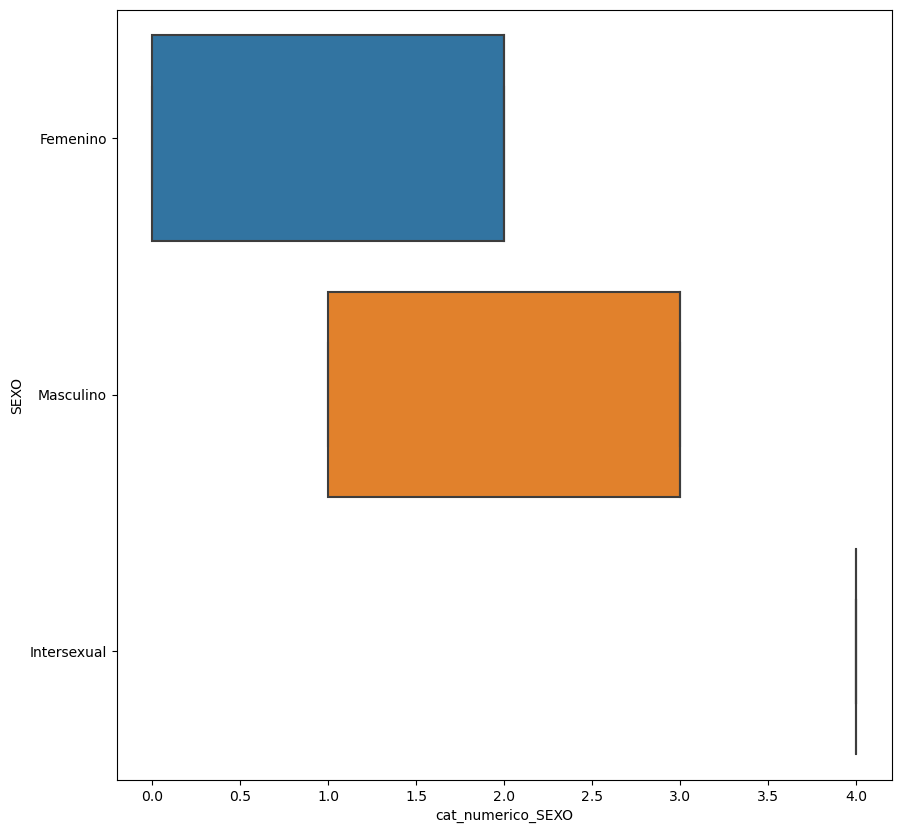

In [18]:
## graficamos nuevamente

plt.figure(figsize=(10,10))

sns.boxplot(x='cat_numerico_SEXO',y='SEXO',data=data_relevante)
plt.show()

ya tenemos la informacion que necesitamos correctamente, revisemos las otras variables

In [19]:
variables=["SEXO","ESTRATO SOCIOECONÓMICO","DEPARTAMENTO DE ORIGEN","SECTOR IES","NIVEL DE FORMACIÓN","MODALIDAD DE LÍNEA",
                 "MODALIDAD DEL CRÉDITO"]

In [20]:
# grafiquemos departamento de origen
# mapeamos cada valor de texto a un valor numerico

mapping={cat: idx for idx, cat in enumerate(data_relevante['DEPARTAMENTO DE ORIGEN'].unique())}
data_relevante['cat_numerico_dep_origen']=data_relevante['DEPARTAMENTO DE ORIGEN'].map(mapping)

C:\Users\Home\AppData\Local\Temp\ipykernel_15832\3659576146.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_relevante['cat_numerico_dep_origen']=data_relevante['DEPARTAMENTO DE ORIGEN'].map(mapping)


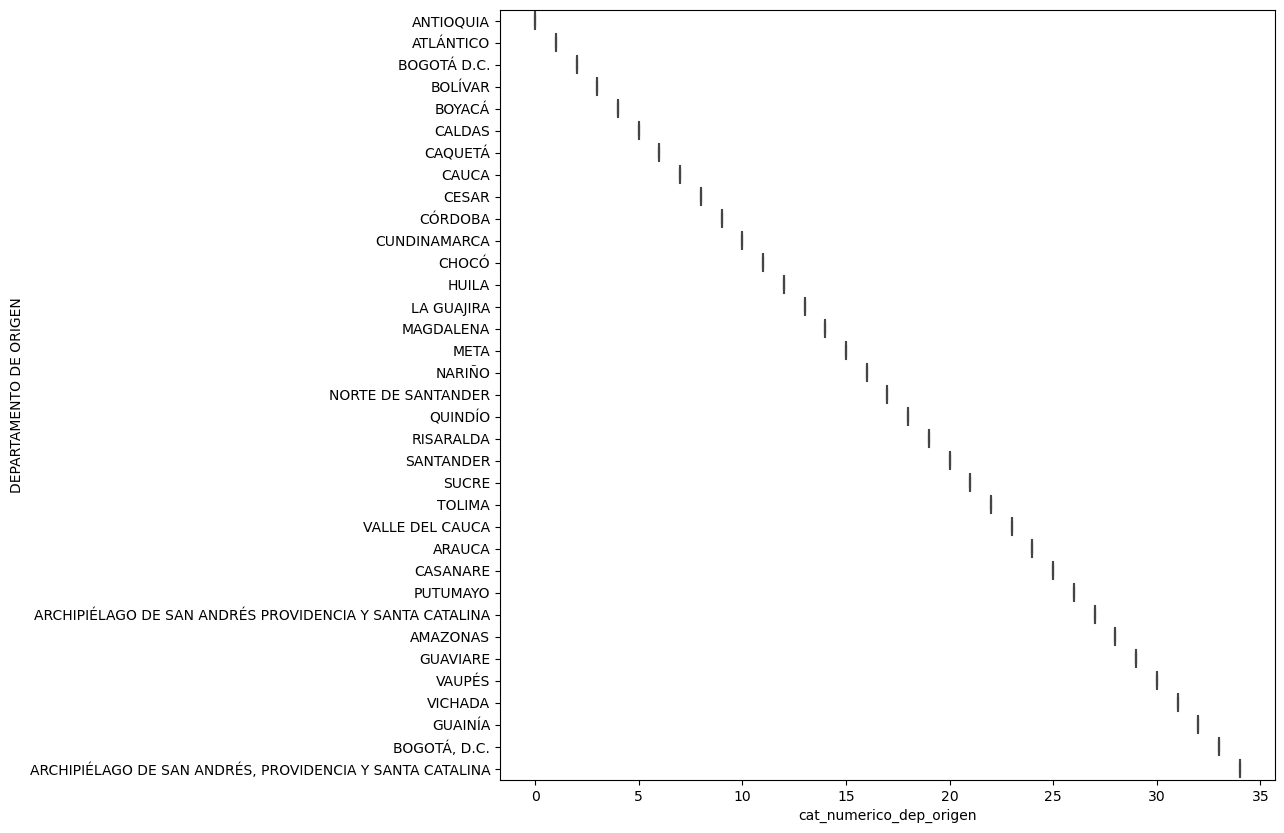

In [21]:
# graficamos nuevamente

plt.figure(figsize=(10,10))

sns.boxplot(x='cat_numerico_dep_origen',y='DEPARTAMENTO DE ORIGEN',data=data_relevante)
plt.show()

los departamentos no presentan ningun error tipografico

In [22]:
# revision sector IES

mapping={cat: idx for idx, cat in enumerate(data_relevante['SECTOR IES'].unique())}
data_relevante['cat_numerico_sector_ies']=data_relevante['SECTOR IES'].map(mapping)

C:\Users\Home\AppData\Local\Temp\ipykernel_15832\1863304087.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_relevante['cat_numerico_sector_ies']=data_relevante['SECTOR IES'].map(mapping)


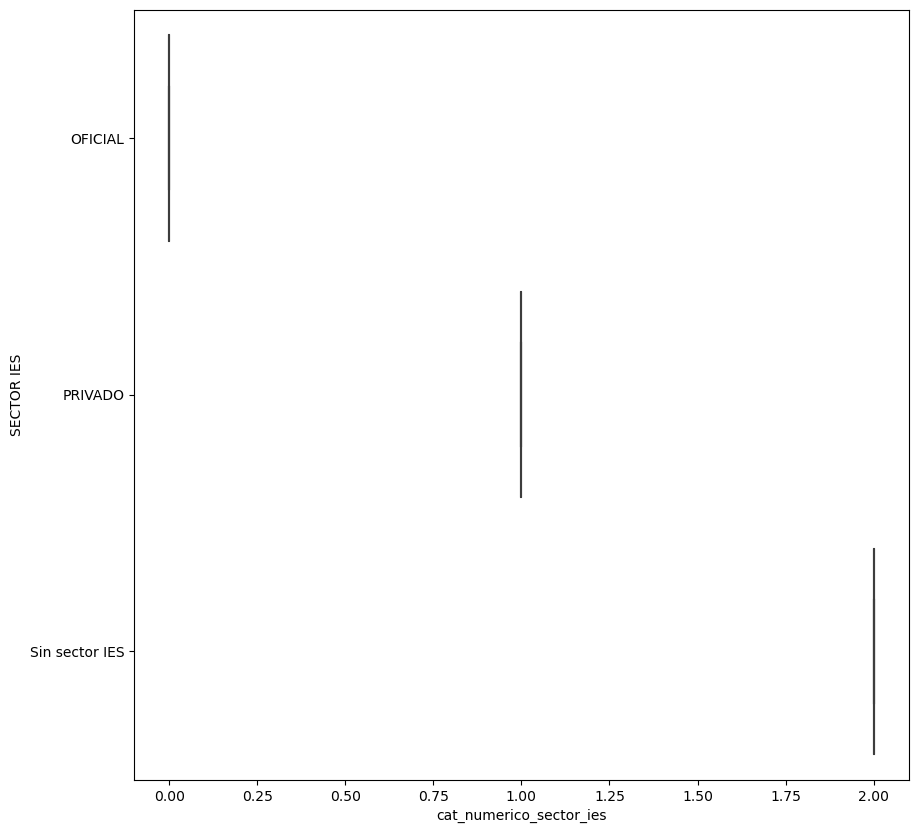

In [23]:
# graficamos nuevamente

plt.figure(figsize=(10,10))

sns.boxplot(x='cat_numerico_sector_ies',y='SECTOR IES',data=data_relevante)
plt.show()

Sin sector IES es un agregado que inicialmente colocamos para los valores NAN, no se evidencia errores

In [24]:
# revision NIVEL DE FORMACIÓN

mapping={cat: idx for idx, cat in enumerate(data_relevante['NIVEL DE FORMACIÓN'].unique())}
data_relevante['cat_numerico_niv_formacion']=data_relevante['NIVEL DE FORMACIÓN'].map(mapping)

C:\Users\Home\AppData\Local\Temp\ipykernel_15832\3118578298.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_relevante['cat_numerico_niv_formacion']=data_relevante['NIVEL DE FORMACIÓN'].map(mapping)


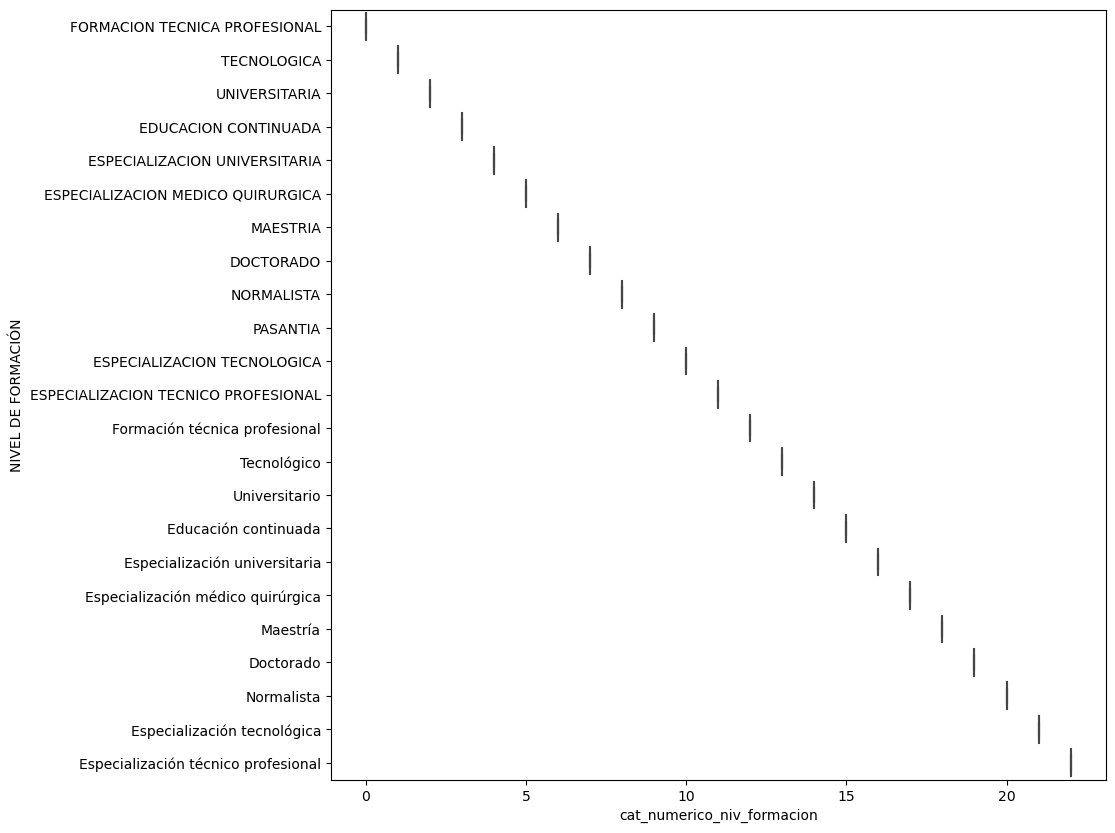

In [25]:
plt.figure(figsize=(10,10))

sns.boxplot(x='cat_numerico_niv_formacion',y='NIVEL DE FORMACIÓN',data=data_relevante)
plt.show()

como supusimos, la variable nivel de formacion presenta errores de tipografica debido a las minusculas y mayusculas 

In [151]:
data_relevante["NIVEL DE FORMACIÓN"]=data_relevante["NIVEL DE FORMACIÓN"].replace({
    "ESPECIALIZACION MEDICO QUIRURGICA":"Especialización médico quirúrgica",
    "ESPECIALIZACION TECNOLOGICA":"Especialización universitaria",
    "ESPECIALIZACION UNIVERSITARIA":"Especialización universitaria",
    "ESPECIALIZACION UNIVERSITARIA":"Formación técnica profesional",
    "MAESTRIA":"Maestría",
    "NORMALISTA":"Normalista",
    "UNIVERSITARIA":"Universitario",
    "FORMACION TECNICA PROFESIONAL":"Formación técnica profesional",
    "TECNOLOGICA":"Tecnológico",
    "DOCTORADO":"Doctorado",
    "EDUCACION CONTINUADA":"Educación continuada",
    "ESPECIALIZACION TECNICO PROFESIONAL":"Formación técnica profesional"
},regex=True)

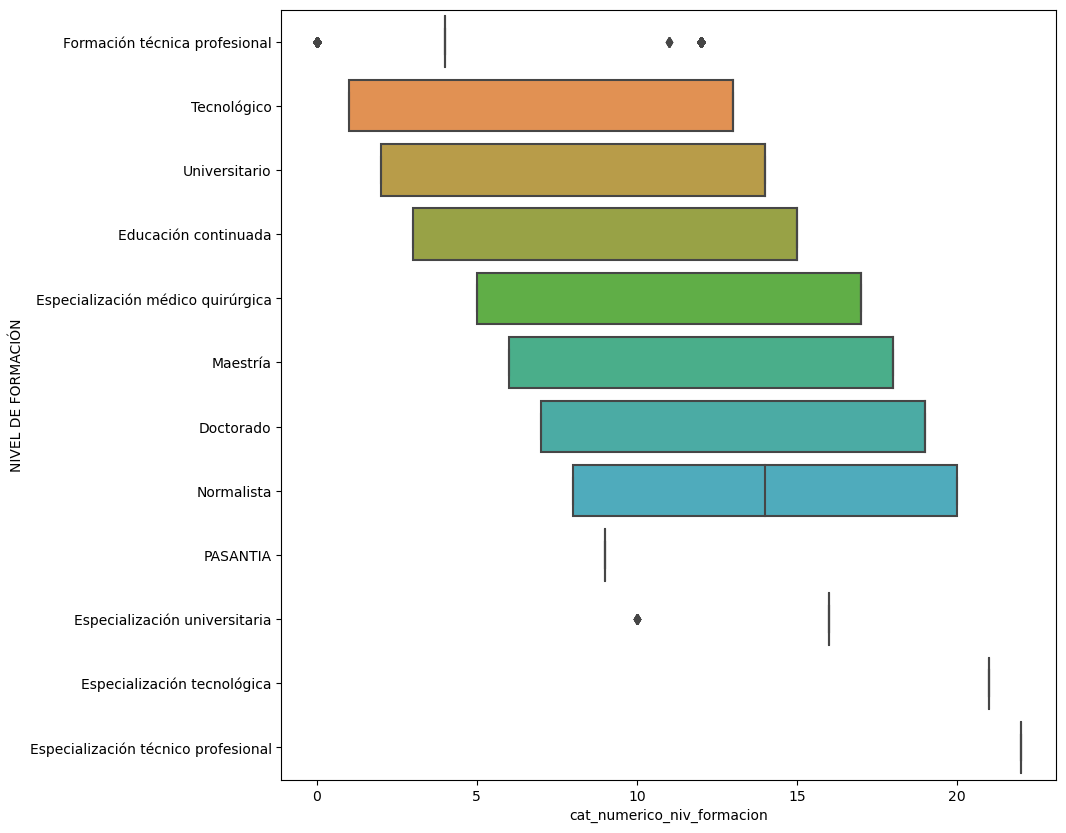

In [152]:
plt.figure(figsize=(10,10))

sns.boxplot(x='cat_numerico_niv_formacion',y='NIVEL DE FORMACIÓN',data=data_relevante)
plt.show()

In [153]:
# colocamos una ayuda para la parte de arriba ya que son demasiadas variables
unicos=set(data_relevante["NIVEL DE FORMACIÓN"])
unicos_list=list(unicos)
ordenados=sorted(unicos_list)

for v,k in enumerate(ordenados):
    print(v,k)

0 Doctorado
1 Educación continuada
2 Especialización médico quirúrgica
3 Especialización tecnológica
4 Especialización técnico profesional
5 Especialización universitaria
6 Formación técnica profesional
7 Maestría
8 Normalista
9 PASANTIA
10 Tecnológico
11 Universitario


no tenemos mas problemas con la variable, podemos continuar

C:\Users\Home\AppData\Local\Temp\ipykernel_15832\1134495326.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_relevante['cat_numerico_MODALIDAD DE LÍNEA']=data_relevante['MODALIDAD DE LÍNEA'].map(mapping)


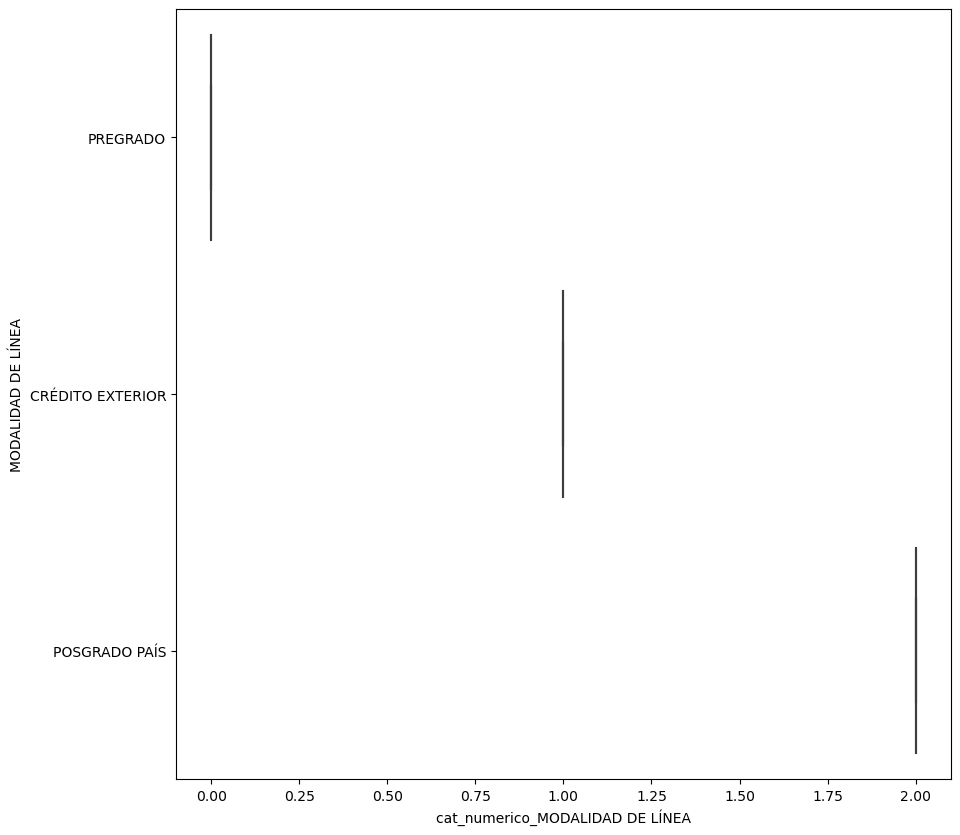

In [29]:

mapping={cat: idx for idx, cat in enumerate(data_relevante['MODALIDAD DE LÍNEA'].unique())}
data_relevante['cat_numerico_MODALIDAD DE LÍNEA']=data_relevante['MODALIDAD DE LÍNEA'].map(mapping)

plt.figure(figsize=(10,10))

sns.boxplot(x='cat_numerico_MODALIDAD DE LÍNEA',y='MODALIDAD DE LÍNEA',data=data_relevante)
plt.show()

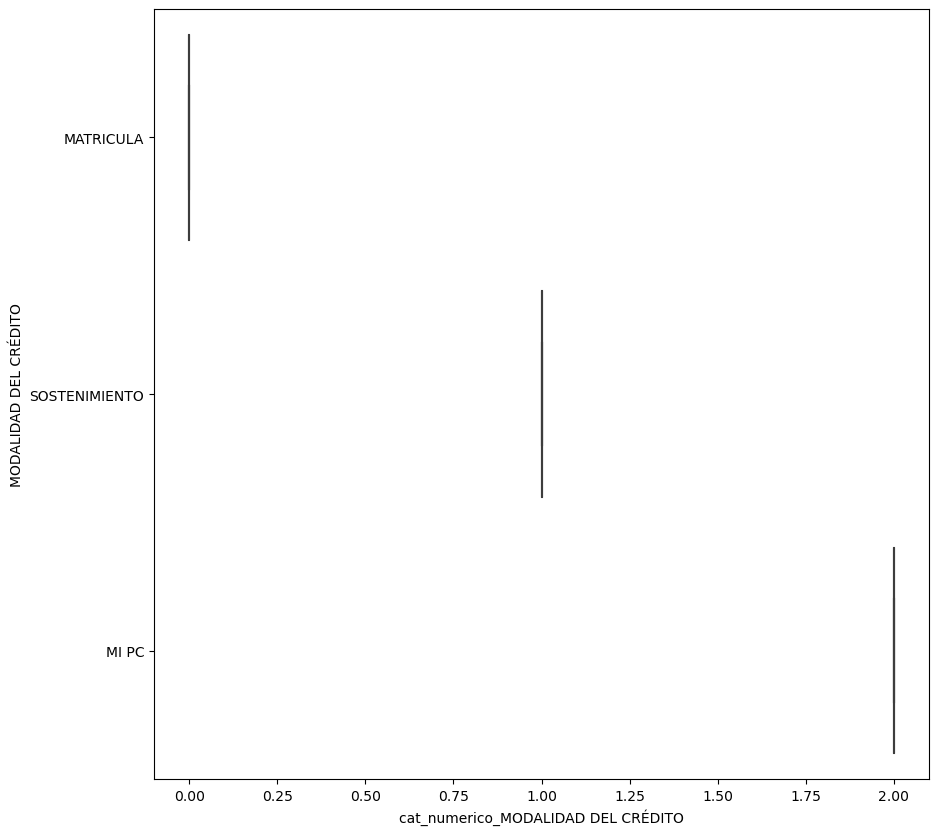

In [30]:
mapping={cat: idx for idx, cat in enumerate(data_relevante['MODALIDAD DEL CRÉDITO'].unique())}
data_relevante['cat_numerico_MODALIDAD DEL CRÉDITO']=data_relevante['MODALIDAD DEL CRÉDITO'].map(mapping)

plt.figure(figsize=(10,10))

sns.boxplot(x='cat_numerico_MODALIDAD DEL CRÉDITO',y='MODALIDAD DEL CRÉDITO',data=data_relevante)
plt.show()

finalmente la revision de datos ha concluido, los datos estan consistentes y se ha solucionado los problemas tipograficos, podemos continuar con el EDA y responder las preguntas del estudio

# Analisis exploratorio de los datos (EDA)

en este apartado vamos a realizar la revision de los datos y vamos a responder las preguntas planteadas en nuestro estudio, recordemos las preguntas

1. que estratos socieconomicos son los mas beneficiados por los recursos del icetex?
2. que departamentos se listan con mas financiacion de parte de esta entidad?
3. que niveles de educacion son los que financia el icetex? (tecnologo,tecnico,pregrado,posgrado etc)
4. cuales son las modalidades de credito mas usadas
5. cuales son los sexos que mas recursos del icetex recibe? existe alguna relacion entre sexo y beneficio?


## que estratos socieconomicos son los mas beneficiados por los recursos del icetex?

In [31]:
estratos=data_relevante.groupby("ESTRATO SOCIOECONÓMICO")["SEXO"].count()


In [32]:
estratos

ESTRATO SOCIOECONÓMICO
1    43825
2    47464
3    32022
4    13257
5     5414
6     2613
Name: SEXO, dtype: int64

In [33]:
import seaborn as sns

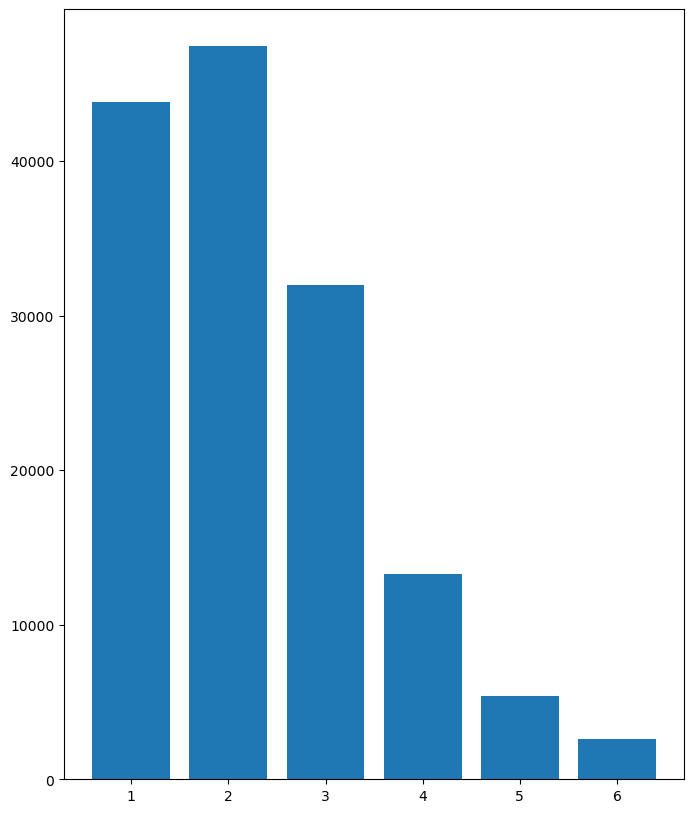

In [34]:
fig,ax=plt.subplots(figsize=(8,10))
ax.bar(estratos.index,estratos)
plt.show()

Con la grafica podemos evidenciar que la poblacion estudiada no tiene un comportamiento normal ya que la gran parte de la poblacion se encuentra hacia la izquierda siendo los estratos 1 y 2 los mas beneficiados por creditos del icetex durante el tiempo estudiado.

## Que departamentos se listan con mas financiacion de parte de esta entidad?

In [35]:
departamentos=data_relevante[["DEPARTAMENTO DE ORIGEN","MODALIDAD DEL CRÉDITO"]]

In [36]:
total_departamentos=data_relevante.groupby("DEPARTAMENTO DE ORIGEN")["DEPARTAMENTO DE ORIGEN"].count()

In [37]:
total_departamentos_top_10=total_departamentos.nlargest(10)
total_departamentos_top_10

DEPARTAMENTO DE ORIGEN
VALLE DEL CAUCA    8800
ANTIOQUIA          8686
SANTANDER          8504
CUNDINAMARCA       7768
BOYACÁ             7044
NARIÑO             6511
BOLÍVAR            6508
TOLIMA             6389
CÓRDOBA            6200
SUCRE              6002
Name: DEPARTAMENTO DE ORIGEN, dtype: int64

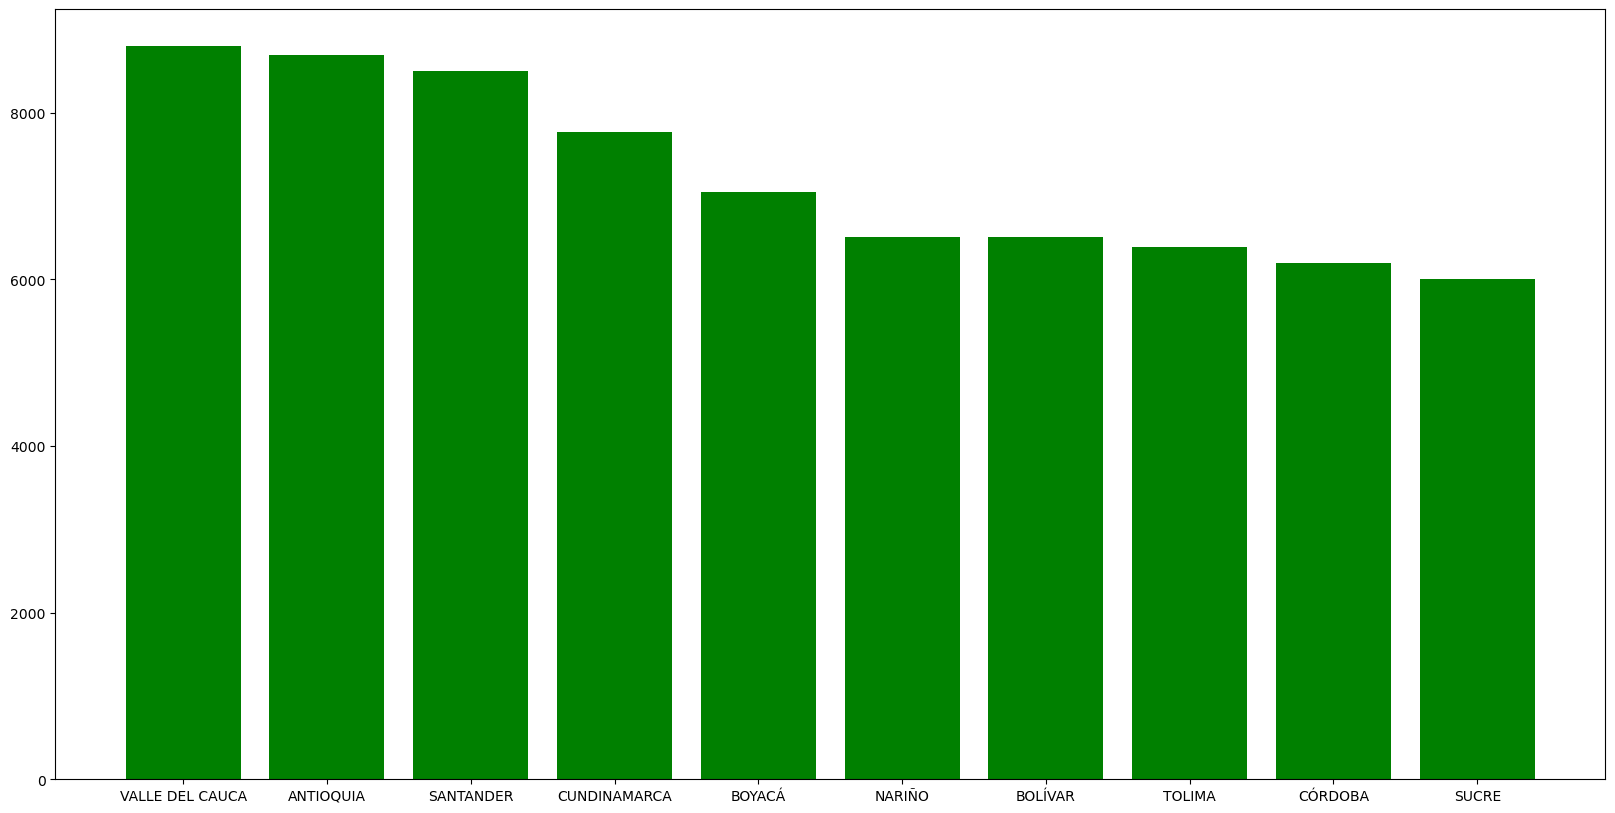

In [38]:
plt.figure(figsize=(20,10))
plt.bar(total_departamentos_top_10.index,total_departamentos_top_10,color="green")
plt.show()

realizando un analisis de barra con relacion a los departamentos mas beneficiados, podemos concluir que valle del cauca, antioquia, santander y cundinamarca son los mas beneficiados de los creditos icetex, curiosamente se pensaba al inicio que cundinamarca y la region capital seria los mayores pero nos llevamos una sorpresa con este grafico

## que niveles de educacion son los que financia el icetex? (tecnologo,tecnico,pregrado,posgrado etc)

In [154]:
niveles_de_educacion=data_relevante.groupby("NIVEL DE FORMACIÓN")["NIVEL DE FORMACIÓN"].count()
niveles_de_educacion.sort_values(ascending=False)

NIVEL DE FORMACIÓN
Universitario                          82851
Maestría                               15942
Formación técnica profesional          11230
Especialización universitaria          10808
Tecnológico                            10446
Educación continuada                    9257
Especialización médico quirúrgica       2545
Doctorado                               1376
PASANTIA                                 112
Especialización tecnológica               18
Normalista                                 6
Especialización técnico profesional        4
Name: NIVEL DE FORMACIÓN, dtype: int64

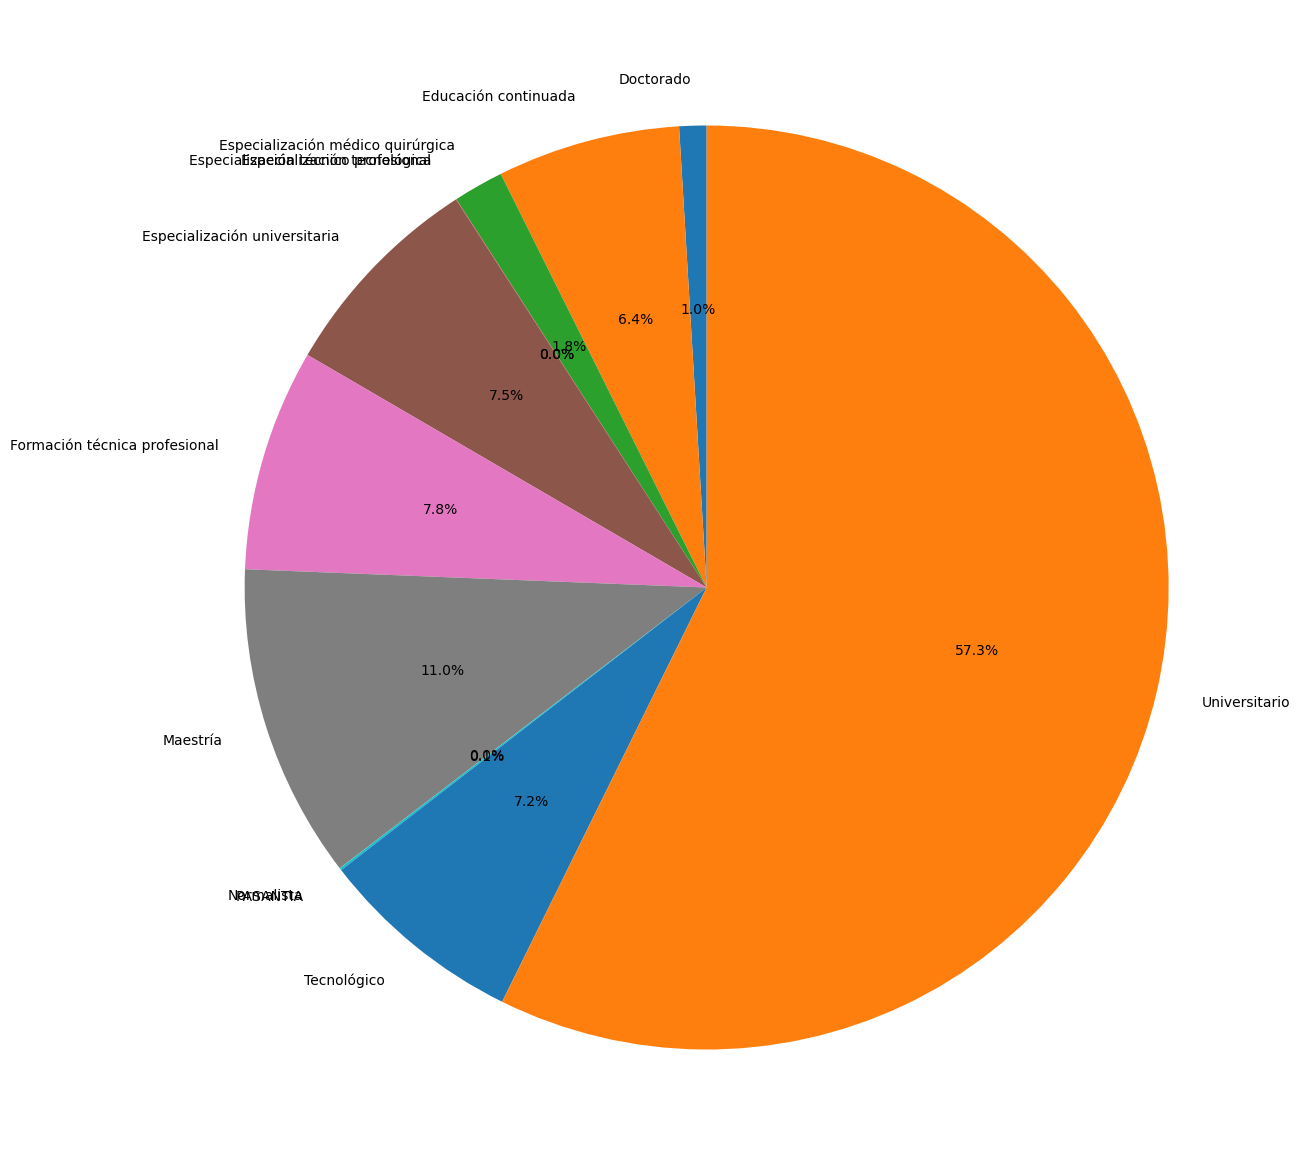

In [155]:
fig,ax=plt.subplots(figsize=(20,15))
ax.pie(niveles_de_educacion,labels=niveles_de_educacion.index,startangle=90,autopct='%1.1f%%')
plt.show()

In [156]:
# creemos una tabla con los porcentajes para ser mas detallistas

data=pd.DataFrame(niveles_de_educacion)
data

,NIVEL DE FORMACIÓN
NIVEL DE FORMACIÓN,
Doctorado,1376
Educación continuada,9257
Especialización médico quirúrgica,2545
Especialización tecnológica,18
Especialización técnico profesional,4
Especialización universitaria,10808
Formación técnica profesional,11230
Maestría,15942
Normalista,6


In [157]:
# obtenemos el total general de los valores
total_general=data["NIVEL DE FORMACIÓN"].sum()
total_general

144595

In [158]:
# aplicamos para sacar los pesos de cada renglon
data["Porcentaje de participacion"]=(data["NIVEL DE FORMACIÓN"]/total_general)*100

In [159]:
data.sort_values("Porcentaje de participacion",ascending=False)

,NIVEL DE FORMACIÓN,Porcentaje de participacion
NIVEL DE FORMACIÓN,,
Universitario,82851,57.298662
Maestría,15942,11.025277
Formación técnica profesional,11230,7.766520
Especialización universitaria,10808,7.474671
Tecnológico,10446,7.224316
Educación continuada,9257,6.402019
Especialización médico quirúrgica,2545,1.760089
Doctorado,1376,0.951624
PASANTIA,112,0.077458


podemos ver en resumen que el nivel universitario, representa el 57.29% del total de creditos adquiridos, luego sigue las maestrias y las formaciones de tecnico profesional.

Esto nos deja varias cosas claras, que el icetex financia en una buena medida a las profesiones como tal, pero tiene baja financiacion en los niveles de formacion mas directos como son los tecnicos y tecnologicos. Esto tambien sopone que en este periodo hubo una oferta considerable de profesionales graduados, pero muy pocos profesionales con nivel de posgrado.

In [45]:
## tambien podemos colocar cierto estilo al df usando styler de pandas

# establecemos el  tope, en este caso deseo que me marque todo lo mayor a 35%
tope=35

# creamos una funcion para aplicar este tope

def filtro(valor):
    if valor>35:
        return 'background-color: red'
    else:
        return 'background-color: yellow'
    
# aplicamos el formato con styler

styled_data=data.style.applymap(filtro,subset=["Porcentaje de participacion"])

In [46]:
styled_data # df con styler 

,NIVEL DE FORMACIÓN,Porcentaje de participacion
NIVEL DE FORMACIÓN,,
Doctorado,1376,0.951624
EDUCACION CONTINUADA,3290,2.275321
ESPECIALIZACION TECNICO PROFESIONAL,4,0.002766
Educación continuada,5967,4.126699
Especialización médico quirúrgica,2545,1.760089
Especialización tecnológica,18,0.012449
Especialización técnico profesional,4,0.002766
Especialización universitaria,10808,7.474671
Formación técnica profesional,11226,7.763754


## cuales son las modalidades de credito mas usadas?


In [47]:
modalidades=data_relevante.groupby("MODALIDAD DEL CRÉDITO")["MODALIDAD DEL CRÉDITO"].count()
modalidades

MODALIDAD DEL CRÉDITO
MATRICULA        128639
MI PC               346
SOSTENIMIENTO     15610
Name: MODALIDAD DEL CRÉDITO, dtype: int64

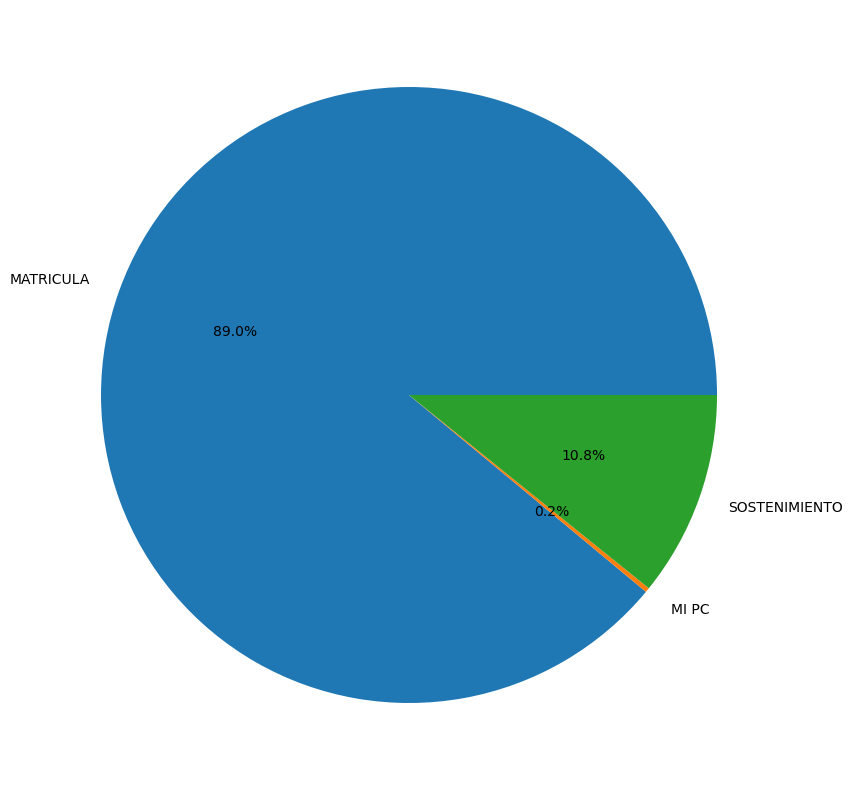

In [48]:
fig,ax=plt.subplots(figsize=(10,10))
ax.pie(modalidades,labels=modalidades.index,autopct='%1.1f%%')
plt.show()

con un 89% las modalidades de matricula tienen mayor impacto en esta muestra, le sigue sostenimiento y finalmente mi pc. Esto nos deja claro que el icetex financia sobre todo acceso a la educacion y tiene sentido si analizamos primera grafica ya que, parte de la poblacion beneficiada por el icetex es estratos 1 y 2.

cuales son los sexos que mas recursos del icetex recibe? existe alguna relacion entre sexo y beneficio?

In [49]:
# definimos un df donde se muestre el sexo y el beneficio en este caso la data mas cercana a beneficio es modalidad de credito

In [50]:
relaciones=data_relevante[["SEXO","MODALIDAD DEL CRÉDITO"]]

In [51]:
relaciones

,SEXO,MODALIDAD DEL CRÉDITO
0,Femenino,MATRICULA
1,Femenino,MATRICULA
2,Femenino,MATRICULA
3,Femenino,SOSTENIMIENTO
4,Femenino,MATRICULA
...,...,...
144590,Masculino,MATRICULA
144591,Masculino,MATRICULA
144592,Masculino,MATRICULA
144593,Masculino,MATRICULA


In [52]:
# vamos ahora a agrupar por sexo y que nos muestre las distintas modalidades por cantidad

In [53]:
data_relaciones=relaciones.groupby(["SEXO","MODALIDAD DEL CRÉDITO"])["MODALIDAD DEL CRÉDITO"].count()

In [54]:
data_relaciones # ya tenemos las agrupaciones por groub by pero estan como serie, debemos transformarla como df para trabajar mejor
# la informacion

SEXO         MODALIDAD DEL CRÉDITO
Femenino     MATRICULA                66233
             MI PC                      160
             SOSTENIMIENTO             7563
Intersexual  MATRICULA                    2
Masculino    MATRICULA                62404
             MI PC                      186
             SOSTENIMIENTO             8047
Name: MODALIDAD DEL CRÉDITO, dtype: int64

In [55]:
# debido a que el group by esta agrupando, para poder dejar la informacion en fila ordenadamente debemos usar el metodo unstack
# que convierte la serie agrupada en una matriz cuadrada en filas
df_relaciones=data_relaciones.unstack().reset_index().fillna(0)
# despues reseteamos la columna indice para que nos salga una columna de indice y finalmente el metodo fillna para reemplazar valores
# NaN 

In [56]:
df_relaciones # este es el preliminar ahora corregido

MODALIDAD DEL CRÉDITO,SEXO,MATRICULA,MI PC,SOSTENIMIENTO
0,Femenino,66233.0,160.0,7563.0
1,Intersexual,2.0,0.0,0.0
2,Masculino,62404.0,186.0,8047.0


In [57]:
df_relaciones.columns

Index(['SEXO', 'MATRICULA', 'MI PC', 'SOSTENIMIENTO'], dtype='object', name='MODALIDAD DEL CRÉDITO')

In [58]:
# cambiamos el nombre de la columna indice para evitar confusiones

df_relaciones.index.name='Indice'

In [59]:
df_relaciones

MODALIDAD DEL CRÉDITO,SEXO,MATRICULA,MI PC,SOSTENIMIENTO
Indice,,,,
0,Femenino,66233.0,160.0,7563.0
1,Intersexual,2.0,0.0,0.0
2,Masculino,62404.0,186.0,8047.0


finalmente tenemos la informacion consisa, en este caso las variables a revisar sera matricula, mi pc y sostenimiento.

In [60]:
import statsmodels.api as sm

In [61]:
# creamos la variable dummy para modalidad del credito
dummy_modalidad=pd.get_dummies(relaciones["MODALIDAD DEL CRÉDITO"])
dummy_sexo=pd.get_dummies(relaciones["SEXO"])

In [62]:
dummy_sexo

,Femenino,Intersexual,Masculino
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
144590,0,0,1
144591,0,0,1
144592,0,0,1
144593,0,0,1


In [63]:
# unimos las variables dummis obtenidas con el df principal 
df_with_dummies=pd.concat([relaciones,dummy_modalidad],axis=1)
df_with_dummies=pd.concat([df_with_dummies,dummy_sexo],axis=1)

In [64]:
# este es el resultado parcial
df_with_dummies

,SEXO,MODALIDAD DEL CRÉDITO,MATRICULA,MI PC,SOSTENIMIENTO,Femenino,Intersexual,Masculino
0,Femenino,MATRICULA,1,0,0,1,0,0
1,Femenino,MATRICULA,1,0,0,1,0,0
2,Femenino,MATRICULA,1,0,0,1,0,0
3,Femenino,SOSTENIMIENTO,0,0,1,1,0,0
4,Femenino,MATRICULA,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...
144590,Masculino,MATRICULA,1,0,0,0,0,1
144591,Masculino,MATRICULA,1,0,0,0,0,1
144592,Masculino,MATRICULA,1,0,0,0,0,1
144593,Masculino,MATRICULA,1,0,0,0,0,1


In [65]:
# eliminar la columna modalidad del credito

df_with_dummies.drop("MODALIDAD DEL CRÉDITO",axis=1,inplace=True)
df_with_dummies.drop("SEXO",axis=1,inplace=True)

In [66]:
# informacion lista para el uso
df_with_dummies

,MATRICULA,MI PC,SOSTENIMIENTO,Femenino,Intersexual,Masculino
0,1,0,0,1,0,0
1,1,0,0,1,0,0
2,1,0,0,1,0,0
3,0,0,1,1,0,0
4,1,0,0,1,0,0
...,...,...,...,...,...,...
144590,1,0,0,0,0,1
144591,1,0,0,0,0,1
144592,1,0,0,0,0,1
144593,1,0,0,0,0,1


In [67]:
df_with_dummies.columns

Index(['MATRICULA', 'MI PC', 'SOSTENIMIENTO', 'Femenino', 'Intersexual',
       'Masculino'],
      dtype='object')

In [97]:
# definimos las variables a explicar

x=df_with_dummies[['Masculino','Femenino','Intersexual']]
y=df_with_dummies[['MATRICULA']]

In [98]:
# agregamos una constante al modelo

c=sm.add_constant(x)

In [99]:
# ajustamos el modelo de regresion lineal

model=sm.OLS(y,x).fit()

In [100]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              MATRICULA   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     27.19
Date:                Thu, 17 Aug 2023   Prob (F-statistic):           1.56e-12
Time:                        20:03:03   Log-Likelihood:                -37340.
No. Observations:              144595   AIC:                         7.469e+04
Df Residuals:                  144592   BIC:                         7.471e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Masculino       0.8834      0.001    749.512      

A pesar que intentamos realizar un proceso de regresion, esta investigacion nos permite determinar que con los datos consultados no es suficiente poder llegar a medir si existe una relacion directa entre sexos y matricula

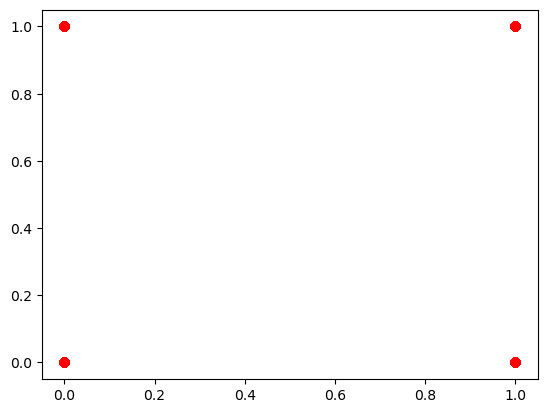

In [101]:
x_1=df_with_dummies['Masculino']
y_1=df_with_dummies['MATRICULA']
plt.scatter(x_1,y_1,color='red')
plt.show()

vamos a intentarlo con los estratos socieconomicos, la ides es intentar explicar la matricula con relacion a los estratos y el sexo

In [108]:
# agregando las variables dicotomicas de estrato

df_with_estratos=data_relevante[["SEXO","MODALIDAD DEL CRÉDITO","ESTRATO SOCIOECONÓMICO"]]


# extrayendo las variables dummys
dummy_modalidad=pd.get_dummies(df_with_estratos["MODALIDAD DEL CRÉDITO"])
dummy_sexo=pd.get_dummies(df_with_estratos["SEXO"])
dummy_estrato=pd.get_dummies(df_with_estratos["ESTRATO SOCIOECONÓMICO"])
df_with_estratos

,SEXO,MODALIDAD DEL CRÉDITO,ESTRATO SOCIOECONÓMICO
0,Femenino,MATRICULA,1
1,Femenino,MATRICULA,1
2,Femenino,MATRICULA,1
3,Femenino,SOSTENIMIENTO,1
4,Femenino,MATRICULA,1
...,...,...,...
144590,Masculino,MATRICULA,6
144591,Masculino,MATRICULA,6
144592,Masculino,MATRICULA,6
144593,Masculino,MATRICULA,6


In [110]:
# concatenando todo 

df_with_dummys_estratos=pd.concat([df_with_estratos,dummy_modalidad],axis=1)
df_with_dummys_estratos=pd.concat([df_with_dummys_estratos,dummy_sexo],axis=1)
df_with_dummys_estratos=pd.concat([df_with_dummys_estratos,dummy_estrato],axis=1)

df_with_dummys_estratos

,SEXO,MODALIDAD DEL CRÉDITO,ESTRATO SOCIOECONÓMICO,MATRICULA,MI PC,SOSTENIMIENTO,Femenino,Intersexual,Masculino,1,2,3,4,5,6
0,Femenino,MATRICULA,1,1,0,0,1,0,0,1,0,0,0,0,0
1,Femenino,MATRICULA,1,1,0,0,1,0,0,1,0,0,0,0,0
2,Femenino,MATRICULA,1,1,0,0,1,0,0,1,0,0,0,0,0
3,Femenino,SOSTENIMIENTO,1,0,0,1,1,0,0,1,0,0,0,0,0
4,Femenino,MATRICULA,1,1,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144590,Masculino,MATRICULA,6,1,0,0,0,0,1,0,0,0,0,0,1
144591,Masculino,MATRICULA,6,1,0,0,0,0,1,0,0,0,0,0,1
144592,Masculino,MATRICULA,6,1,0,0,0,0,1,0,0,0,0,0,1
144593,Masculino,MATRICULA,6,1,0,0,0,0,1,0,0,0,0,0,1


In [ ]:
# eliminando las columnas que no necesitamos nuevamente

In [111]:
df_with_dummys_estratos.drop("MODALIDAD DEL CRÉDITO",axis=1,inplace=True)
df_with_dummys_estratos.drop("SEXO",axis=1,inplace=True)
df_with_dummys_estratos.drop("ESTRATO SOCIOECONÓMICO",axis=1,inplace=True)

In [112]:
df_with_dummys_estratos

,MATRICULA,MI PC,SOSTENIMIENTO,Femenino,Intersexual,Masculino,1,2,3,4,5,6
0,1,0,0,1,0,0,1,0,0,0,0,0
1,1,0,0,1,0,0,1,0,0,0,0,0
2,1,0,0,1,0,0,1,0,0,0,0,0
3,0,0,1,1,0,0,1,0,0,0,0,0
4,1,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
144590,1,0,0,0,0,1,0,0,0,0,0,1
144591,1,0,0,0,0,1,0,0,0,0,0,1
144592,1,0,0,0,0,1,0,0,0,0,0,1
144593,1,0,0,0,0,1,0,0,0,0,0,1


In [117]:
df_with_dummys_estratos.columns

Index([    'MATRICULA',         'MI PC', 'SOSTENIMIENTO',      'Femenino',
         'Intersexual',     'Masculino',               1,               2,
                     3,               4,               5,               6],
      dtype='object')

In [129]:
# definimos las variables a explicar 
x=df_with_dummys_estratos[['Masculino',3]]
y=df_with_dummys_estratos['MATRICULA']

In [130]:
# entrenamos el modelo
model=sm.OLS(y,x).fit()

In [131]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:              MATRICULA   R-squared (uncentered):                -508.205
Model:                            OLS   Adj. R-squared (uncentered):           -508.212
Method:                 Least Squares   F-statistic:                         -7.215e+04
Date:                Thu, 17 Aug 2023   Prob (F-statistic):                        1.00
Time:                        20:40:39   Log-Likelihood:                     -1.4700e+05
No. Observations:              144595   AIC:                                  2.940e+05
Df Residuals:                  144593   BIC:                                  2.940e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

como tenemos que realizar varias regresiones por estrato vamos a contruir una funcion que realice las multiples regresiones lineales sin necesidad de ser manuales

In [143]:
# construimos la funcion
def regresiones_estratos(data,categoria_sexo,variable_explicada):
    for estrato in range(1,7):
        x=data[["{}".format(categoria_sexo),estrato]]
        y=data["{}".format(variable_explicada)]
        
        model=sm.OLS(y,x).fit()
        
        print(model.summary())

In [145]:
# ejecutamos la funcion
regresiones_estratos(df_with_dummys_estratos,'Femenino','MATRICULA')

                                 OLS Regression Results                                
Dep. Variable:              MATRICULA   R-squared (uncentered):                -486.324
Model:                            OLS   Adj. R-squared (uncentered):           -486.330
Method:                 Least Squares   F-statistic:                         -7.215e+04
Date:                Thu, 17 Aug 2023   Prob (F-statistic):                        1.00
Time:                        20:56:47   Log-Likelihood:                     -1.4382e+05
No. Observations:              144595   AIC:                                  2.876e+05
Df Residuals:                  144593   BIC:                                  2.877e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

A pesar de nuestro intento, el modelo no es lo suficientemente fuerte como para explicar la situacion, puede ser que los datos que estamos usando no sean los que necesitamos y tal ves esta sea la causa ya que como lo vimos antes en el grafico calculado, los datos no tenian un comportamiento ideal.

sera necesario revisar los datos para retomar el proceso, pero por el momento se concluye que no es posible determinar si existe relacion causal debido a los datos que tenemos

## CONCLUSIONES:
1. los estratos 1 y 2 son los mas relacionados con creditos icetex
2. los departamentos con mas beneficiaros son valle del cauca, antioquia, santander y cundinamarca, sin duda este punto es interesante porque si suponemos que bogota es la ciudad con mas accesos a este tipo de servicios, lo que nos indica este estudio es que en lugares mas desarrollados economicamente , la presencia de mas demanda de creditos educativos por esta entidad se acrecenta, no es de extrañar que estos departamentos sean los mas importantes a nivel economico.
3. En su mayoria, los principales niveles educativos que financia el icetex son particularmente los niveles de pregrado, siguiendole maestria y curiosamente especializaciones y niveles de tecnico y tecnologo. Esto nos infiere un comportamiento a abordar las necesidades basicas del mercado laboral con conocimientos basicos o conocimientos aplicados muy especificos. Sin embargo los doctorados o niveles de formacion mas cientificos casi no aparecen.
4.con un 89% el icetex se enfoca en modalidades de credito del tipo matricula, los otros tipos son muy bajos lo que nos indica que, apesar de las dificultades en el acceso a la educacion en colombia, al menos, el icetex sirve como opcion para poder ingresar a la educacion superior o al menos es una opcion en la mesa de decisiones y los estudiantes pueden financiar sus estudios en una parte.
5. estadisticamente no podemos inferir si existe una relacion causal entre sexos y matriculas debido a la estructura de datos que tenemos, sin embargo, el conteo de creditos para mujeres es ligeramente superior en comparacion con los hombres, las demas modalidades de credito presentan variaciones pero estas son bajas, se necesitaria un estudio mas detallado para afirmar esta conclusion final